<a href="https://colab.research.google.com/github/Zulfa-Varvani/ML-things/blob/main/Cruise_crew_size_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Name:** Zulfa Varvani

**Role:** T&O Data Analyst Coordinator

**Organization:** TOHacks

In [1]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()
sns.set_style('darkgrid')

from google.colab import files
uploaded = files.upload()

Saving cruise_ship_info.csv to cruise_ship_info.csv


In [3]:
import io

#1. Read file and display columns

df = pd.read_csv(io.BytesIO(uploaded['cruise_ship_info.csv']))
df.head()

,Ship_name,Cruise_line,Age,Tonnage,passengers,length,cabins,passenger_density,crew
0,Journey,Azamara,6,30.277,6.94,5.94,3.55,42.64,3.55
1,Quest,Azamara,6,30.277,6.94,5.94,3.55,42.64,3.55
2,Celebration,Carnival,26,47.262,14.86,7.22,7.43,31.80,6.70
3,Conquest,Carnival,11,110.000,29.74,9.53,14.88,36.99,19.10
4,Destiny,Carnival,17,101.353,26.42,8.92,13.21,38.36,10.00


In [4]:
df.describe() #good to get overall basic statistics of data

#we have a 9 by 158 dataset
#mix of numerical and categorical data
#df.describe() ignores categorical data

,Age,Tonnage,passengers,length,cabins,passenger_density,crew
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,15.689873,71.284671,18.457405,8.130633,8.830000,39.900949,7.794177
std,7.615691,37.229540,9.677095,1.793474,4.471417,8.639217,3.503487
min,4.000000,2.329000,0.660000,2.790000,0.330000,17.700000,0.590000
25%,10.000000,46.013000,12.535000,7.100000,6.132500,34.570000,5.480000
50%,14.000000,71.899000,19.500000,8.555000,9.570000,39.085000,8.150000
75%,20.000000,90.772500,24.845000,9.510000,10.885000,44.185000,9.990000
max,48.000000,220.000000,54.000000,11.820000,27.000000,71.430000,21.000000


In [5]:
#2. Calculate basic statistics of the data (count, mean, std, etc) and examine data and state your observations.
# will calculate count, mean, std, min, max, and median for all columns

def get_stats(col): #use function to find statistics for each column and return array of all values
  if df[col].dtype == object and isinstance(df.iloc[0][col], str):
    count = df[col].count()
    mean = std = min = max = median = 'N/A'
  else:
    count = df[col].count()
    mean = df[col].mean()
    std = df[col].std()
    min = df[col].min()
    max = df[col].max()
    median = df[col].median()
  stats = np.array([count, mean, std, min, max, median])
  return stats

data_stats = pd.DataFrame(columns=['Ship_name', 'Cruise_line', 'Age', 'Tonnage', 'passengers', 'length', 'cabins', 'passenger_density', 'crew'],
                            index=['count', 'mean', 'standard deviation', 'minimum', 'maximum', 'median']) #empty dataframe

for col in data_stats:
  data_stats[col] = get_stats(col)

data_stats

#Observations:
#There were a total of 158 ships that were recorded in the dataset with 9 of their features recorded
#Average age of ships was about 16 years, with youngest being 4 years and oldest being 48 years
#From the recorded 158 ships, average of tonnage was 71, passengers were 18, length being 8, about 9 cabins, passenger density of 40, and average crew of 7
#Unfortunately, there are some assumptions to be made to this dataset in terms of units of measure for age, tonnage, passengers, length, passenger density, and crew

,Ship_name,Cruise_line,Age,Tonnage,passengers,length,cabins,passenger_density,crew
count,158,158,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,N/A,N/A,15.689873,71.284671,18.457405,8.130633,8.830000,39.900949,7.794177
standard deviation,N/A,N/A,7.615691,37.229540,9.677095,1.793474,4.471417,8.639217,3.503487
minimum,N/A,N/A,4.000000,2.329000,0.660000,2.790000,0.330000,17.700000,0.590000
maximum,N/A,N/A,48.000000,220.000000,54.000000,11.820000,27.000000,71.430000,21.000000
median,N/A,N/A,14.000000,71.899000,19.500000,8.555000,9.570000,39.085000,8.150000


In [6]:
# before removing columns and prediction, should view data. count the number of missing values in case of pre-processing
print('Number of missing values in each column: ')
df.isnull().sum()

#it is observable that there is no missing values - no need for imputing

Number of missing values in each column: 


Ship_name            0
Cruise_line          0
Age                  0
Tonnage              0
passengers           0
length               0
cabins               0
passenger_density    0
crew                 0
dtype: int64

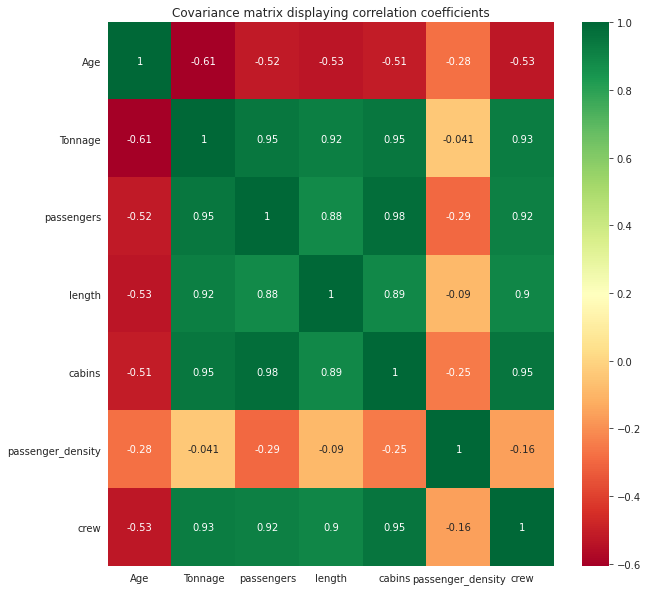

In [7]:
#before looking at categorical values, see the correlation graph - made using seaborn and only checks for linear correlation
corr = df.corr()
top_corr = corr.index[abs(corr['crew'])>0]
plt.figure(figsize=(10,10))
plt.title('Covariance matrix displaying correlation coefficients')
g = sns.heatmap(df[top_corr].corr(),annot=True,cmap='RdYlGn')

#negative values show little correlation as compared to higher positive values

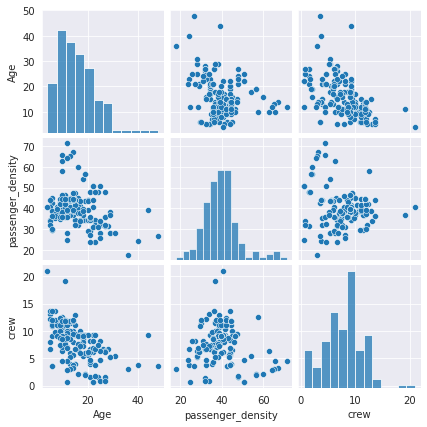

In [8]:
cols = ['Age', 'passenger_density', 'crew']
sns.pairplot(df[cols], height=2.0)

In [9]:
#3. Select columns that will be probably important to predict “crew” size.
#tonnage: the capacity the ship can take is important for determining crew size
#passengers: number of passengers is directly related to how many crew members are needed to manage them
#length: this would be important as the crew would have to fit in the ship to begin with
#cabins: available cabins is also very important as the crew would need a cabin to stay in

#4. If you removed columns explain why you removed those.
#from the data given, it is obvious that ship name and cruise line would have little correlation to crew size
#as well, from the plot shown above, age and passenger density have very little correlation to crew size
#therefore, tonnage, passengers, length, and cabins will be used to predict crew size

#drop columns that are not important for crew size prediction
pred_df = df.drop(['Ship_name', 'Cruise_line', 'Age', 'passenger_density'], axis=1)
pred_df.head()

,Tonnage,passengers,length,cabins,crew
0,30.277,6.94,5.94,3.55,3.55
1,30.277,6.94,5.94,3.55,3.55
2,47.262,14.86,7.22,7.43,6.70
3,110.000,29.74,9.53,14.88,19.10
4,101.353,26.42,8.92,13.21,10.00


In [10]:
#let's view the different categorical features
cat_df = df.select_dtypes(exclude=[np.number])
cat_df.head()

,Ship_name,Cruise_line
0,Journey,Azamara
1,Quest,Azamara
2,Celebration,Carnival
3,Conquest,Carnival
4,Destiny,Carnival


In [11]:
#5. Use one-hot encoding for categorical features.

#Categorical features are ship name and cruise line. Since these are both nominal variables, we should use One Hot Encoding to transform them into numerical features

from sklearn.preprocessing import OneHotEncoder

enc = OneHotEncoder(handle_unknown='ignore', sparse=False)

s = (df.dtypes=='object')
cat_col = list(s[s].index)
print(cat_col)

OH_cols = pd.DataFrame(enc.fit_transform(df[cat_col]))
OH_cols.index = df.index
OH_num = df.drop(cat_col, axis=1)

OH_df = pd.concat([OH_num, OH_cols], axis=1)
OH_df.head()

['Ship_name', 'Cruise_line']


,Age,Tonnage,passengers,length,cabins,passenger_density,crew,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,...,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157
0,6,30.277,6.94,5.94,3.55,42.64,3.55,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,6,30.277,6.94,5.94,3.55,42.64,3.55,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,26,47.262,14.86,7.22,7.43,31.80,6.70,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,11,110.000,29.74,9.53,14.88,36.99,19.10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,17,101.353,26.42,8.92,13.21,38.36,10.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [12]:
#6. Create training and testing sets (use 60% of the data for the training and reminder for testing).
#not using data from removed features

from sklearn.model_selection import train_test_split

x = pred_df.drop(['crew'],axis=1)
y = pred_df.crew

X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.4, random_state=1)
y_train.head()

146     2.95
112     9.00
99     12.00
119    11.85
2       6.70
Name: crew, dtype: float64

In [13]:
#7. Build a machine learning model to predict the ‘crew’ size.
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

lin_reg = LinearRegression()
model = lin_reg.fit(X_train, y_train)
pred = lin_reg.predict(X_test)

print('Mean absolute error: ', mean_absolute_error(y_test, pred))
print('Model accuracy score: ', model.score(X_test, y_test))

Mean absolute error:  0.5696859602761679
Model accuracy score:  0.9380794604576035


In [14]:
#8. Pearson correlation coefficient for the training set and testing data sets.
from scipy.stats import pearsonr

corr, _ = pearsonr(y_test, pred)
print('Pearsons correlation: %.3f' %corr)

Pearsons correlation: 0.970


In [ ]:
#features chosen as pre-processing, but are not considered as hyperparameters: tonnage, passengers, length, and cabins
#standard linear regression used (OLS) --> doesn't have hyper parameter tuning
#would try different models and tune hyper parameters (leaf nodes, lambda, learning rate etc) to improve accuracy
#could also try using a PCA algorithm for model building since the chosen features have high correlation

In [ ]:
#regularization is a form of regression and discourages learning more complex/flexible model to avoid overfitting
#in linear regression, this is lambda parameter in the cost function